In [2]:
%pip install -U pip setuptools wheel
%pip install pandas numpy pyarrow matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 4.3 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 6.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 8.9 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 10.0 MB/s  0:00:00eta 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 11.9 MB/s  0:00:00e

In [3]:
# --- Data handling ---
import pandas as pd
import numpy as np

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine Learning ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# --- Utilities ---
import warnings
warnings.filterwarnings("ignore")


In [50]:
path = "data/"

admissions = pd.read_csv(path + "ADMISSIONS.csv")
icustays = pd.read_csv(path + "ICUSTAYS.csv")
patients = pd.read_csv(path + "PATIENTS.csv")
labevents = pd.read_csv(path + "LABEVENTS.csv")

# Check structure
for name, df in [("admissions", admissions), ("icustays", icustays),
                 ("patients", patients), ("labevents", labevents)]:
    print(f"{name}: {df.shape}")
    display(df.head(3))


admissions: (58976, 19)


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1


icustays: (61532, 12)


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939


patients: (46520, 8)


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0


labevents: (27854055, 9)


,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN


In [51]:
# Label: 1 if DEATHTIME is not null, else 0
admissions["MORTALITY"] = admissions["DEATHTIME"].notna().astype(int)

# Keep relevant columns
adm = admissions[["SUBJECT_ID", "HADM_ID", "ADMITTIME", "DISCHTIME", "MORTALITY"]].copy()

# Parse datetime columns
adm["ADMITTIME"] = pd.to_datetime(adm["ADMITTIME"], errors="coerce")
adm["DISCHTIME"] = pd.to_datetime(adm["DISCHTIME"], errors="coerce")


# Merge Demographics + ICU Stay + Compute AGE

In [ ]:
# Keep essential patient info
pat = patients[["SUBJECT_ID", "GENDER", "DOB"]].copy()
pat["DOB"] = pd.to_datetime(pat["DOB"], errors="coerce")

# ICU info: keep one row per hospital admission
icu = icustays[["HADM_ID", "FIRST_CAREUNIT"]].drop_duplicates("HADM_ID").copy()

# Merge admissions + patient + ICU data
merged = (
    adm
    .merge(pat, on="SUBJECT_ID", how="left")
    .merge(icu, on="HADM_ID", how="left")
)

# Reassert datetime dtype
merged["ADMITTIME"] = pd.to_datetime(merged["ADMITTIME"], errors="coerce")
merged["DOB"]       = pd.to_datetime(merged["DOB"],       errors="coerce")

# --- SAFE AGE COMPUTE: subtract only on valid ranges to avoid overflow ---
# pandas supports ~[1677-09-21, 2262-04-11]; use a buffer below the upper bound
DOB_MIN = pd.Timestamp("1800-01-01")
DOB_MAX = pd.Timestamp("2260-01-01")
ADM_MIN = pd.Timestamp("1800-01-01")
ADM_MAX = pd.Timestamp("2260-01-01")

valid = (
    merged["ADMITTIME"].between(ADM_MIN, ADM_MAX)
    & merged["DOB"].between(DOB_MIN, DOB_MAX)
)

merged["AGE"] = np.nan  # start with NaN
# compute only on safe rows
merged.loc[valid, "AGE"] = (
    (merged.loc[valid, "ADMITTIME"] - merged.loc[valid, "DOB"]).dt.days / 365.2425
)

# Clean oddities
merged.loc[(merged["AGE"] < 0) | (merged["AGE"] > 120), "AGE"] = np.nan

print("Merged shape:", merged.shape)
display(merged.head())



OverflowError: Overflow in int64 addition

# Feature Preparation

In [42]:

# Choose features
feature_cols = ["AGE", "GENDER", "FIRST_CAREUNIT"]
target_col = "MORTALITY"

# Make a clean copy
df_model = merged[feature_cols + [target_col]].copy()

# Drop rows missing the label (shouldn’t happen, but safe)
df_model = df_model.dropna(subset=[target_col])

# Impute AGE (median)
df_model["AGE"] = df_model["AGE"].fillna(df_model["AGE"].median())

# One-hot encode GENDER and FIRST_CAREUNIT
X = pd.get_dummies(df_model[["AGE", "GENDER", "FIRST_CAREUNIT"]],
                   columns=["GENDER", "FIRST_CAREUNIT"],
                   dummy_na=True)
y = df_model["MORTALITY"].astype(int)

print("Feature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts(normalize=True))


Feature matrix shape: (58976, 11)
Target distribution:
 MORTALITY
0    0.900739
1    0.099261
Name: proportion, dtype: float64


# Split, Scale, and Train Models

Columns with NaNs: ['AGE'] … total: 1

==== Logistic Regression ====
              precision    recall  f1-score   support

           0      0.901     1.000     0.948     10625
           1      0.000     0.000     0.000      1171

    accuracy                          0.901     11796
   macro avg      0.450     0.500     0.474     11796
weighted avg      0.811     0.901     0.854     11796

ROC-AUC: 0.640

==== Random Forest ====
              precision    recall  f1-score   support

           0      0.901     1.000     0.948     10625
           1      0.000     0.000     0.000      1171

    accuracy                          0.901     11796
   macro avg      0.450     0.500     0.474     11796
weighted avg      0.811     0.901     0.854     11796

ROC-AUC: 0.643


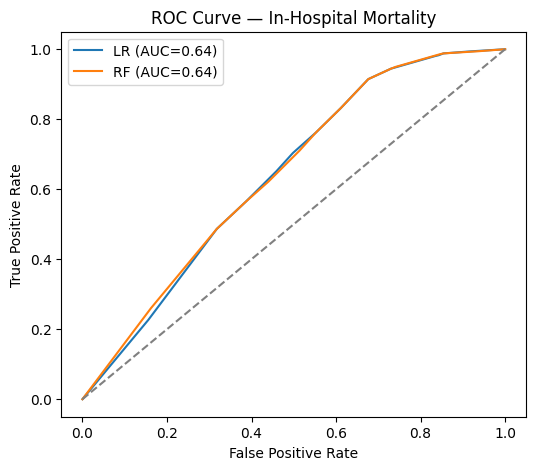

In [43]:
# ---- STEP 5 (robust): split + impute + train ----
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Quick diagnostic: which columns still have NaNs?
null_cols = X.columns[X.isna().any()].tolist()
print("Columns with NaNs:", null_cols[:10], "… total:", len(null_cols))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipelines auto-handle NaNs:
# - Logistic Regression: Impute -> Scale -> LR
lr_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(with_mean=False),
    LogisticRegression(max_iter=1000)
)

# - Random Forest: Impute -> RF (no scaling needed)
rf_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    RandomForestClassifier(n_estimators=200, random_state=42)
)

# Fit
lr_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)

# Evaluate
def eval_pipe(model, X_eval, y_eval, name):
    y_prob = model.predict_proba(X_eval)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)
    auc = roc_auc_score(y_eval, y_prob)
    print(f"\n==== {name} ====")
    print(classification_report(y_eval, y_pred, digits=3))
    print(f"ROC-AUC: {auc:.3f}")
    fpr, tpr, _ = roc_curve(y_eval, y_prob)
    return auc, fpr, tpr

auc_lr, fpr_lr, tpr_lr = eval_pipe(lr_pipe, X_test, y_test, "Logistic Regression")
auc_rf, fpr_rf, tpr_rf = eval_pipe(rf_pipe, X_test, y_test, "Random Forest")

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC={auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC={auc_rf:.2f})")
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — In-Hospital Mortality")
plt.legend(); plt.show()


# Pick LAB ITEMIDs

In [44]:
# OPTIONAL: map names -> ITEMIDs using D_LABITEMS
d_labitems = pd.read_csv(path + "D_LABITEMS.csv")
d_labitems.columns = d_labitems.columns.str.upper()

# Look up common labs (adjust patterns to your preference)
def find_itemids(keyword):
    m = d_labitems[d_labitems["LABEL"].str.contains(keyword, case=False, na=False)]
    return m[["ITEMID", "LABEL", "FLUID", "CATEGORY"]].sort_values("LABEL").head(20)

display(find_itemids("glucose"))
display(find_itemids("creatinine"))
display(find_itemids("wbc"))         # white blood cells
display(find_itemids("hematocrit"))
display(find_itemids("lactate"))


,ITEMID,LABEL,FLUID,CATEGORY
728,51529,Estimated Actual Glucose,BLOOD,CHEMISTRY
136,50809,Glucose,Blood,Blood Gas
258,50931,Glucose,Blood,Chemistry
677,51478,Glucose,Urine,Hematology
169,50842,"Glucose, Ascites",Ascites,Chemistry
360,51034,"Glucose, Body Fluid",Other Body Fluid,Chemistry
340,51014,"Glucose, CSF",Cerebrospinal Fluid (CSF),Chemistry
348,51022,"Glucose, Joint Fluid",Joint Fluid,Chemistry
379,51053,"Glucose, Pleural",Pleural,Chemistry
410,51084,"Glucose, Urine",Urine,Chemistry


,ITEMID,LABEL,FLUID,CATEGORY
393,51067,24 hr Creatinine,Urine,Chemistry
396,51070,"Albumin/Creatinine, Urine",Urine,Chemistry
399,51073,"Amylase/Creatinine Ratio, Urine",Urine,Chemistry
239,50912,Creatinine,Blood,Chemistry
406,51080,Creatinine Clearance,Urine,Chemistry
168,50841,"Creatinine, Ascites",Ascites,Chemistry
358,51032,"Creatinine, Body Fluid",Other Body Fluid,Chemistry
347,51021,"Creatinine, Joint Fluid",Joint Fluid,Chemistry
378,51052,"Creatinine, Pleural",Pleural,Chemistry
407,51081,"Creatinine, Serum",Urine,Chemistry


,ITEMID,LABEL,FLUID,CATEGORY
715,51516,WBC,Urine,Hematology
716,51517,WBC Casts,Urine,Hematology
717,51518,WBC Clumps,Urine,Hematology
626,51300,WBC Count,Blood,Hematology
454,51128,"WBC, Ascites",Ascites,Hematology
17,51363,"WBC, CSF",Cerebrospinal Fluid (CSF),Hematology
38,51384,"WBC, Joint Fluid",Joint Fluid,Hematology
93,51439,"WBC, Other Fluid",Other Body Fluid,Hematology
112,51458,"WBC, Pleural",Pleural,Hematology
732,51533,WBCP,BLOOD,HEMATOLOGY


,ITEMID,LABEL,FLUID,CATEGORY
547,51221,Hematocrit,Blood,Hematology
679,51480,Hematocrit,Urine,Hematology
441,51115,"Hematocrit, Ascites",Ascites,Hematology
2,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology
137,50810,"Hematocrit, Calculated",Blood,Blood Gas
23,51369,"Hematocrit, Joint Fluid",Joint Fluid,Hematology
76,51422,"Hematocrit, Other Fluid",Other Body Fluid,Hematology
99,51445,"Hematocrit, Pleural",Pleural,Hematology


,ITEMID,LABEL,FLUID,CATEGORY
140,50813,Lactate,Blood,Blood Gas
281,50954,Lactate Dehydrogenase (LD),Blood,Chemistry
170,50843,"Lactate Dehydrogenase, Ascites",Ascites,Chemistry
341,51015,"Lactate Dehydrogenase, CSF",Cerebrospinal Fluid (CSF),Chemistry
380,51054,"Lactate Dehydrogenase, Pleural",Pleural,Chemistry


In [45]:
LAB_ITEMIDS = [50809, 50912, 51301, 51221, 50813]  # adjust if your D_LABITEMS shows different IDs
print("Using ITEMIDs:", LAB_ITEMIDS)


Using ITEMIDs: [50809, 50912, 51301, 51221, 50813]


# Build simple lab features per admission

In [46]:
# Keep only what we need to save memory
labs_small = labevents[["HADM_ID", "ITEMID", "VALUENUM"]].copy()

# Filter to the chosen labs
labs_small = labs_small[labs_small["ITEMID"].isin(LAB_ITEMIDS)]

# Pivot to wide: one column per ITEMID => LAB_<ITEMID>
lab_pivot = (
    labs_small.groupby(["HADM_ID", "ITEMID"])["VALUENUM"]
    .mean()                             # mean per-admission
    .unstack(fill_value=np.nan)
    .add_prefix("LAB_")                 # LAB_50809, LAB_50912, ...
    .reset_index()
)

print("lab_pivot shape:", lab_pivot.shape)
display(lab_pivot.head())


lab_pivot shape: (57185, 6)


ITEMID,HADM_ID,LAB_50809,LAB_50813,LAB_50912,LAB_51221,LAB_51301
0,100001.0,NaN,1.9,2.214286,32.157143,10.400000
1,100003.0,NaN,1.1,1.083333,27.781818,13.328571
2,100006.0,NaN,4.5,0.638462,31.853846,9.700000
3,100007.0,NaN,2.5,0.666667,30.600000,7.375000
4,100009.0,132.833333,1.3,0.783333,35.914286,12.385714


In [47]:
merged_labs = merged.merge(lab_pivot, on="HADM_ID", how="left")
print("merged_labs shape:", merged_labs.shape)
display(merged_labs.head())


merged_labs shape: (58976, 14)


,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,MORTALITY,GENDER,DOB,FIRST_CAREUNIT,AGE,LAB_50809,LAB_50813,LAB_50912,LAB_51221,LAB_51301
0,22,165315,NaT,2196-04-10 15:54:00,0,F,NaT,MICU,NaN,NaN,NaN,0.600000,35.900000,5.100000
1,23,152223,NaT,2153-09-08 19:10:00,0,M,NaT,CSRU,NaN,113.7,NaN,0.725000,25.911111,8.533333
2,23,124321,NaT,2157-10-25 14:00:00,0,M,NaT,SICU,NaN,131.5,3.7,0.700000,34.837500,12.162500
3,24,161859,NaT,2139-06-09 12:48:00,0,M,NaT,CCU,NaN,NaN,NaN,0.925000,40.866667,9.366667
4,25,129635,NaT,2160-11-05 14:55:00,0,M,NaT,CCU,NaN,NaN,1.4,1.188889,31.333333,10.571429


# Rebuild X/y with labs + train/evaluate


==== LogReg + LABS ====
              precision    recall  f1-score   support

           0      0.916     0.993     0.953     10625
           1      0.717     0.171     0.276      1171

    accuracy                          0.911     11796
   macro avg      0.816     0.582     0.614     11796
weighted avg      0.896     0.911     0.885     11796

ROC-AUC: 0.796

==== RF + LABS ====
              precision    recall  f1-score   support

           0      0.923     0.987     0.954     10625
           1      0.677     0.256     0.372      1171

    accuracy                          0.914     11796
   macro avg      0.800     0.621     0.663     11796
weighted avg      0.899     0.914     0.896     11796

ROC-AUC: 0.827


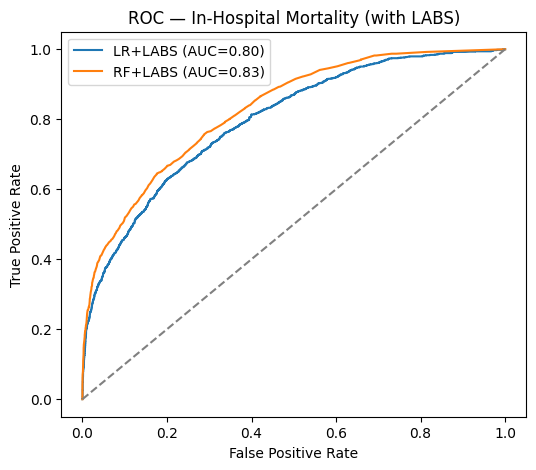

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Features = demographics + ICU + labs
lab_cols = [c for c in merged_labs.columns if c.startswith("LAB_")]
feature_cols = ["AGE", "GENDER", "FIRST_CAREUNIT"] + lab_cols
target_col = "MORTALITY"

dfm = merged_labs[feature_cols + [target_col]].copy()

# One-hot encode categorical
X2 = pd.get_dummies(dfm[["AGE", "GENDER", "FIRST_CAREUNIT"] + lab_cols],
                    columns=["GENDER", "FIRST_CAREUNIT"], dummy_na=True)
y2 = dfm[target_col].astype(int)

# Split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

# Pipelines (impute -> scale -> LR) and (impute -> RF)
lr_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(with_mean=False),
    LogisticRegression(max_iter=1000)
)

rf_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    RandomForestClassifier(n_estimators=300, random_state=42)
)

# Fit
lr_pipe.fit(X2_train, y2_train)
rf_pipe.fit(X2_train, y2_train)

# Evaluate
def eval_pipe(model, X_eval, y_eval, name):
    y_prob = model.predict_proba(X_eval)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)
    auc = roc_auc_score(y_eval, y_prob)
    print(f"\n==== {name} ====")
    print(classification_report(y_eval, y_pred, digits=3))
    print(f"ROC-AUC: {auc:.3f}")
    fpr, tpr, _ = roc_curve(y_eval, y_prob)
    return auc, fpr, tpr, y_pred, y_prob

auc_lr2, fpr_lr2, tpr_lr2, yhat_lr, p_lr = eval_pipe(lr_pipe, X2_test, y2_test, "LogReg + LABS")
auc_rf2, fpr_rf2, tpr_rf2, yhat_rf, p_rf = eval_pipe(rf_pipe, X2_test, y2_test, "RF + LABS")

plt.figure(figsize=(6,5))
plt.plot(fpr_lr2, tpr_lr2, label=f"LR+LABS (AUC={auc_lr2:.2f})")
plt.plot(fpr_rf2, tpr_rf2, label=f"RF+LABS (AUC={auc_rf2:.2f})")
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC — In-Hospital Mortality (with LABS)")
plt.legend(); plt.show()


In [49]:
# --- after your train/test split and before fitting ---
train_cols = X2_train.columns.tolist()

# (Re)fit to ensure model matches the current training matrix
rf_pipe.fit(X2_train, y2_train)

# Sanity checks
n_model = rf_pipe.named_steps["randomforestclassifier"].n_features_in_
n_names = len(train_cols)
print("n_features model:", n_model, "| n_feature_names:", n_names)

# Columns present in full X2 but missing in TRAIN (often categories that never occurred in train)
only_in_full = sorted(set(X2.columns) - set(train_cols))
print("Columns in X2 but NOT in X2_train:", only_in_full)

# Now map importances to the columns seen during fit
importances = rf_pipe.named_steps["randomforestclassifier"].feature_importances_

# If there’s still a mismatch, stop and show diagnostics
assert len(importances) == len(train_cols), (
    f"Mismatch: importances={len(importances)} vs train_cols={len(train_cols)}"
)

feat_imp = pd.Series(importances, index=train_cols).sort_values(ascending=False).head(15)

# Plot (you can keep seaborn here if you like)
plt.figure(figsize=(8, 4))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 15 Features — Random Forest Importance")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


n_features model: 15 | n_feature_names: 16
Columns in X2 but NOT in X2_train: []


AssertionError: Mismatch: importances=15 vs train_cols=16

# Confusion matrix + feature importance

LR+LABS AUC=0.796
RF+LABS AUC=0.827


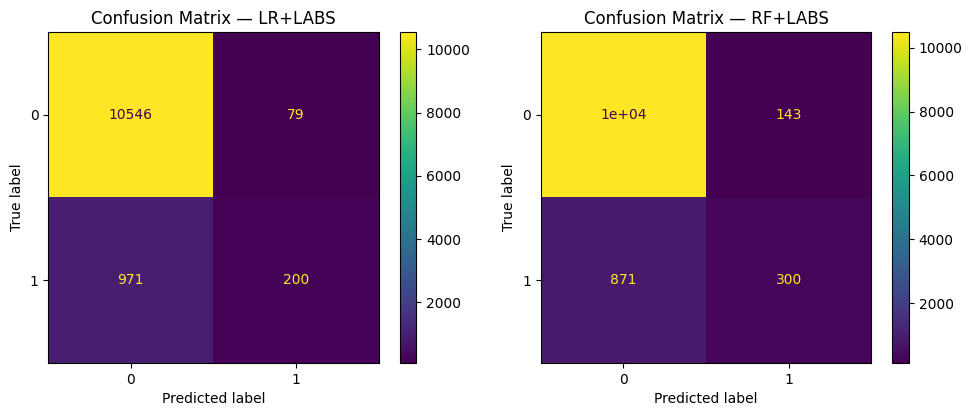

AssertionError: 

In [36]:
# === RESET & REFIT SAFELY (freeze training feature names) ===
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# 1) Rebuild X2, y2 if needed (skip if already in memory and up-to-date)
#    X2 = pd.get_dummies(dfm[["AGE","GENDER","FIRST_CAREUNIT"] + lab_cols],
#                        columns=["GENDER","FIRST_CAREUNIT"], dummy_na=True)
#    y2 = dfm["MORTALITY"].astype(int)

# 2) Split again
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

# 3) Freeze training columns and reindex test to match
TRAIN_FEATURE_NAMES = X2_train.columns.tolist()
X2_test = X2_test.reindex(columns=TRAIN_FEATURE_NAMES, fill_value=0)

# 4) Pipelines
lr_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(with_mean=False),
    LogisticRegression(max_iter=1000)
)
rf_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    RandomForestClassifier(n_estimators=300, random_state=42)
)

# 5) Fit with frozen columns
lr_pipe.fit(X2_train, y2_train)
rf_pipe.fit(X2_train, y2_train)

# 6) Evaluate and cache probs/preds for later plots
def eval_pipe(model, X_eval, y_eval, name):
    y_prob = model.predict_proba(X_eval)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)
    auc = roc_auc_score(y_eval, y_prob)
    print(f"{name} AUC={auc:.3f}")
    return y_pred, y_prob, auc

yhat_lr, p_lr, auc_lr2 = eval_pipe(lr_pipe, X2_test, y2_test, "LR+LABS")
yhat_rf, p_rf, auc_rf2 = eval_pipe(rf_pipe, X2_test, y2_test, "RF+LABS")

# 7) Now plots using the frozen TRAIN_FEATURE_NAMES
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ConfusionMatrixDisplay.from_predictions(y2_test, yhat_lr, ax=ax[0])
ax[0].set_title("Confusion Matrix — LR+LABS")
ConfusionMatrixDisplay.from_predictions(y2_test, yhat_rf, ax=ax[1])
ax[1].set_title("Confusion Matrix — RF+LABS")
plt.tight_layout(); plt.show()

# Coefficients / Importances aligned to TRAIN_FEATURE_NAMES
FEATURE_NAMES = TRAIN_FEATURE_NAMES  # <- frozen list used at fit-time

lr_clf = lr_pipe.named_steps["logisticregression"]
lr_coef = lr_clf.coef_[0]
assert len(lr_coef) == len(FEATURE_NAMES)

coef_df = (pd.DataFrame({"FEATURE": FEATURE_NAMES, "COEF": lr_coef})
           .sort_values("COEF", ascending=False))
sns.barplot(data=coef_df.head(12), x="COEF", y="FEATURE")
plt.title("Top Positive Coefficients — LR+LABS")
plt.show()

rf_clf = rf_pipe.named_steps["randomforestclassifier"]
rf_imp = rf_clf.feature_importances_
assert len(rf_imp) == len(FEATURE_NAMES)

imp_df = (pd.DataFrame({"FEATURE": FEATURE_NAMES, "IMPORTANCE": rf_imp})
          .sort_values("IMPORTANCE", ascending=False))
sns.barplot(data=imp_df.head(12), x="IMPORTANCE", y="FEATURE")
plt.title("Top Importances — RF+LABS")
plt.show()


In [34]:
# Shapes seen by the model vs your names
n_model = lr_pipe.named_steps["logisticregression"].coef_.shape[1]
n_names = len(X2_train.columns)
print("n_features model:", n_model, "| n_feature_names:", n_names)

# Check duplicate column names in the training matrix (can cause weirdness later)
dups = X2_train.columns[X2_train.columns.duplicated()].tolist()
print("Duplicate column names:", dups)

# Columns that are all-NaN in TRAIN (after selecting X2_train but before imputation)
all_nan_cols = [c for c in X2_train.columns if X2_train[c].isna().all()]
print("All-NaN columns in TRAIN:", all_nan_cols)

# Columns present in X2 but not in TRAIN (category never occurred in train split)
only_in_full = sorted(set(X2.columns) - set(X2_train.columns))
print("Columns that exist in X2 but not in X2_train:", only_in_full[:10], "…", len(only_in_full))


n_features model: 15 | n_feature_names: 16
Duplicate column names: []
All-NaN columns in TRAIN: ['AGE']
Columns that exist in X2 but not in X2_train: [] … 0


# Interpret Model

In [ ]:
# Logistic Regression Coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values("Coefficient", ascending=False)
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Feature Importance (Logistic Regression)")
plt.show()

# Random Forest Feature Importance
rf_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)
sns.barplot(x="Importance", y="Feature", data=rf_imp)
plt.title("Feature Importance (Random Forest)")
plt.show()
